In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read_file = "E:\GitHubRepositories\All_website_crawlers\lagou\with_requests\position.csv"
data = pd.read_csv(read_file, encoding="utf-8")
data = data[:].drop(['ID'],axis=1)

data.describe()

,学历要求,工作经验,薪资
count,420,420,420
unique,4,6,78
top,本科,3-5年,10k-20k
freq,356,176,59


describe()可以看出每个属性对应值得个数以及有多少个不同的值，接下来分别查看每个属性下有什么值。

In [69]:
print(data['学历要求'].unique())
print(data['工作经验'].unique())
print(data['薪资'].unique())

['硕士' '不限' '本科' '大专']
['1-3年' '3-5年' '不限' '5-10年' '1年以下' '应届毕业生']
['10k-20k' '28k-30k' '5k-10k' '20k-40k' '13k-25k' '4k-8k' '15k-30k'
 '30k-50k' '15k-25k' '10k-15k' '13k-26k' '14k-25k' '18k-32k' '2k-4k'
 '20k-30k' '9k-18k' '12k-24k' '8k-15k' '8k-12k' '25k-40k' '12k-16k'
 '16k-26k' '6k-9k' '12k-20k' '9k-15k' '11k-16k' '14k-28k' '20k-25k'
 '5k-9k' '8k-14k' '8k-11k' '20K-40K' '7k-12k' '15k-20k' '8k-16k' '6k-12k'
 '10k-16k' '13k-19k' '18k-25k' '13k-20k' '7k-14k' '18k-35k' '8k-10k'
 '12k-18k' '13k-18k' '11k-20k' '14k-20k' '5k-7k' '6k-10k' '25k-50k'
 '17k-23k' '7k-10k' '3k-6k' '15k-27k' '10k-12k' '4k-6k' '6k-8k' '4k-5k'
 '8k-13k' '23k-46k' '20k-35k' '4k-7k' '10k-14k' '10k-18k' '5k-6k'
 '18k-30k' '18k-36k' '2k-3k' '35k-65k' '6k-7k' '25k-35k' '11k-22k'
 '15k-18k' '14k-18k' '40k-60k' '25k-45k' '19k-25k' '5k-8k']


从上述可以看到，学历要求和工作经验的值比较少且没有缺失值与异常值，可以直接进行分析；但薪资的分布比较多，总计有78种，为了更好地进行分析，我们要对薪资做一个预处理，对其分组，取每个薪资范围的中位数。

In [70]:
def pre_salary(data):
    salarys = data["薪资"].values
    salary_dic = {}
    for salary in salarys:
        #根据‘-’进行分割并去掉‘k’，分别将两端的值转换成整数
        min_sa = int(salary.split('-')[0][:-1])
        max_sa = int(salary.split('-')[1][:-1])
        #求中位数
        median_sa = (min_sa + max_sa) / 2
        #判断其值并划分到指定范围
        if median_sa < 5:
            salary_dic[u'5k以下'] = salary_dic.get(u'5k以下',0) + 1
        elif median_sa >5 and median_sa < 10:
            salary_dic[u'5k-10k'] = salary_dic.get(u'5k-10k', 0) + 1
        elif median_sa > 10 and median_sa < 20:
            salary_dic[u'10k-20k'] = salary_dic.get(u'10k-20k', 0) + 1
        elif median_sa > 20 and median_sa < 30:
            salary_dic[u'20k-30k'] = salary_dic.get(u'20k-30k', 0) + 1
        elif median_sa > 30 and median_sa < 40:
            salary_dic[u'30k-40k'] = salary_dic.get(u'30k-40k', 0) + 1
        else:
            salary_dic[u'40以上'] = salary_dic.get(u'40以上', 0) + 1
    print(salary_dic)
    return salary_dic

导入相关包并做好相应设置

In [71]:
import matplotlib.style as psl
import matplotlib.pyplot as plt
psl.use('seaborn-colorblind') #设置图表风格
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['font.family']='sans-serif'

In [72]:
#绘制环状图
def draw_pie(dic):
    labels = []
    count = []
    for key,value in dic.items():
        labels.append(key)
        count.append(value)
    fig, ax = plt.subplots(figsize=(8,6), subplot_kw=dict(aspect="equal"))
    #绘制饼状图，wedgeprops表示每个扇形的宽度
    wedges, texts = ax.pie(count,wedgeprops=dict(width=0.5),startangle=0)
    #文本框设置
    bbox_props = dict(boxstyle="square,pad=0.9",fc="w",ec="k",lw=0)
    #线与箭头设置
    kw = dict(xycoords='data', textcoords='data',arrowprops=dict(arrowstyle="-"),bbox=bbox_props,zorder=0,va="center")
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        # 设置文本框在扇形的哪一侧
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        # 用于设置箭头的弯曲程度
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        # annotate()用于对已绘制的图形做标注，text是注释文本，含 'xy' 的参数跟坐标点有关
        text = labels[i] + ": " + str('%.2f' %((count[i])/sum(count)*100)) + "%"
        ax.annotate(text, size=13, xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                     horizontalalignment=horizontalalignment, **kw)
    plt.show()

先对学历要求进行分析，绘制环状图

{'硕士': 21, '不限': 20, '本科': 356, '大专': 23}


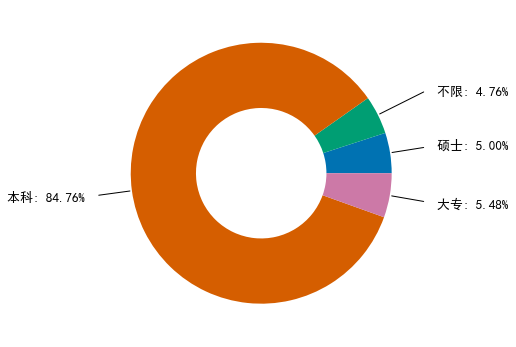

In [73]:
def draw_education(data):
    educations = list(data[u'学历要求'].values)
    edu_dic = {}
    
    for education in educations:
        edu_dic[education] = edu_dic.get(education, 0) + 1
    print(edu_dic)
    # edu_series = pd.Series(edu_dic)
    draw_pie(edu_dic)
    
draw_education(data)

python数据分析师的学历大部分要求是本科，占了86%，接下来对“工作经验”进行可视化，用柱状图表示

{'1-3年': 153, '3-5年': 176, '不限': 43, '5-10年': 29, '1年以下': 9, '应届毕业生': 10}


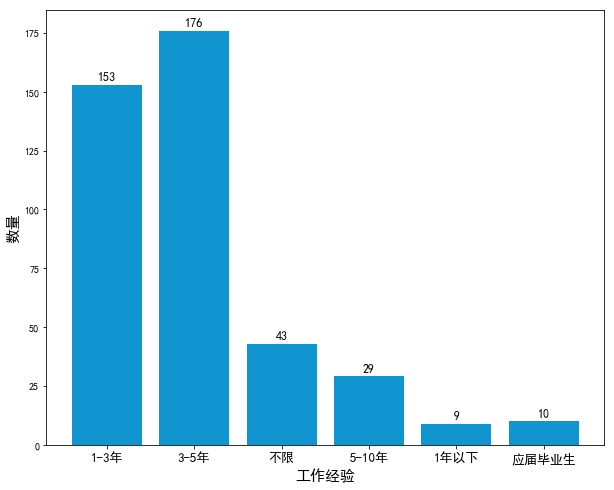

In [74]:
def draw_workYear(data):
    workyears = list(data[u'工作经验'].values)
    wy_dic = {}
    labels = []
    count = []
    # 得到工作经验对应的数目并保存到count中
    for workyear in workyears:
        wy_dic[workyear] = wy_dic.get(workyear, 0) + 1
    print(wy_dic)
    # wy_series = pd.Series(wy_dic)
    # 分别得到 count 的 key 和 value
    for key, value in wy_dic.items():
        labels.append(key)
        count.append(value)
    # 生成 keys 个数的数组
    x = np.arange(len(labels)) + 1
    # 将 values 转换成数组
    y = np.array(count)
    
    fig, axes = plt.subplots(figsize=(10, 8))
    axes.bar(x, y, color="#1195d0")
    plt.xticks(x, labels, size=13, rotation=0)
    plt.xlabel(u'工作经验', fontsize=15)
    plt.ylabel(u'数量', fontsize=15)
    
    # 根据坐标将数字标在图中，ha、va 为对齐方式
    for a, b in zip(x, y):
        plt.text(a, b+1, '%.0f' % b, ha='center', va='bottom', fontsize=12)
    plt.show()

draw_workYear(data)

从柱状图可以看出，python数据分析师的工作经验绝大部分要求1-5年。接下来对薪资状况进行分析，绘制饼图，为了不增加工作量，直接使用前面绘制好的图。

{'10k-20k': 181, '20k-30k': 85, '5k-10k': 38, '40以上': 96, '5k以下': 9, '30k-40k': 11}


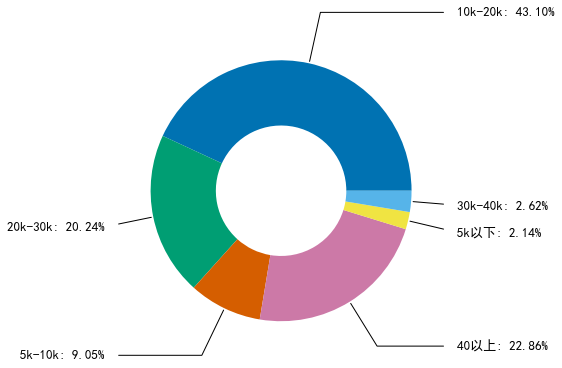

In [75]:
def draw_salary(data):
    salary_dic = pre_salary(data)
    draw_pie(salary_dic)
draw_salary(data)

In [76]:
# 读取文件获得文字
def read_txt(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
        file.close()
    return text

In [77]:
# 用 jieba 对文本进行分割，并去掉频率比较高的停用词
import jieba
def cut_text(text):
    stopwords =['熟悉','技术','职位','相关','工作','开发','使用','能力',
                '优先','描述','任职','经验','经验者','具有','具备','以上','善于',
                '一种','以及','一定','进行','能够','我们']
    for stopword in stopwords:
        jieba.del_word(stopword)
    
    words = jieba.lcut(text)
    content = " ".join(words)
    return content

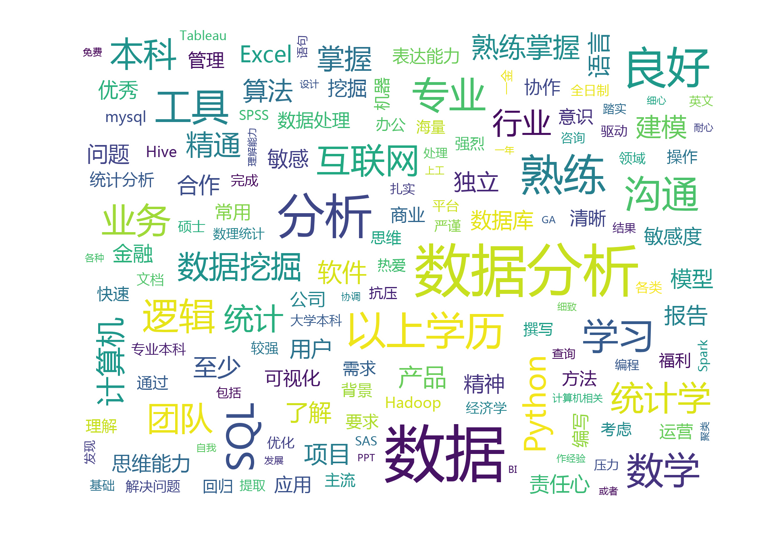

In [78]:
from wordcloud import WordCloud
# 绘制词云图
def draw_wordcloud(content):
    
    wc = WordCloud(
        font_path = 'c:\\Windows\Fonts\msyh.ttf',
        background_color = 'white',
        max_font_size=150,  # 字体最大值
        min_font_size=24,  # 字体最小值
        random_state=800, # 随机数
        collocations=False, # 避免重复单词
        width=1600,height=1200,margin=35, # 图像宽高，字间距
    )
    wc.generate(content)

    plt.figure(dpi=160) # 通过这里可以放大或缩小
    plt.imshow(wc, interpolation='catrom',vmax=1000)
    plt.axis("off") # 隐藏坐标
    
text = read_txt('E:\GitHubRepositories\All_website_crawlers\lagou\with_requests\description.txt')
content = cut_text(text)
draw_wordcloud(content)